# Principal Component Analysis with Cancer Data

In [196]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [197]:
%cd C:\Users\amol.kumar\Desktop\R5_Internal_project

C:\Users\amol.kumar\Desktop\R5_Internal_project


In [198]:
BC=pd.read_csv("breast-cancer-wisconsin-data.csv")
BC.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [199]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [200]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [201]:
BC.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [202]:
# We could see "?" values in column, this should be removed from data set
print(len(BC[BC['Bare Nuclei']=='?']))
#BC=BC.replace(BC[BC['Bare Nuclei']=='?'],1)
# Check for missing value in any other column
BC.isnull().sum()

16


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [203]:
# No missing values found. So let us try to remove ? from bare nuclei column
BC['Bare Nuclei']=BC['Bare Nuclei'].replace('?',"1")
# Get count of rows having ?
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [204]:
BC['ID'].nunique()
BC['Bare Nuclei']=BC['Bare Nuclei'].astype('int')

In [205]:
print(BC.info())
print(BC['ID'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB
None
645


In [206]:
BC=BC.drop_duplicates()

In [207]:
pd.value_counts(BC['Class'])

2    452
4    238
Name: Class, dtype: int64

In [208]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [209]:
# Check for correlation of variable

In [210]:
BC=BC.drop('ID',axis=1)

In [211]:
BC.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


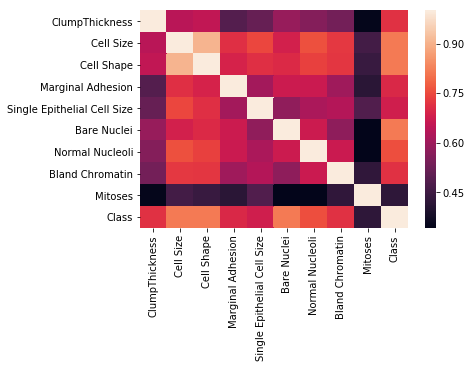

In [212]:
sns.heatmap(BC.corr())

In [213]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\amol.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\amol.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\amol.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\amol.kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid va

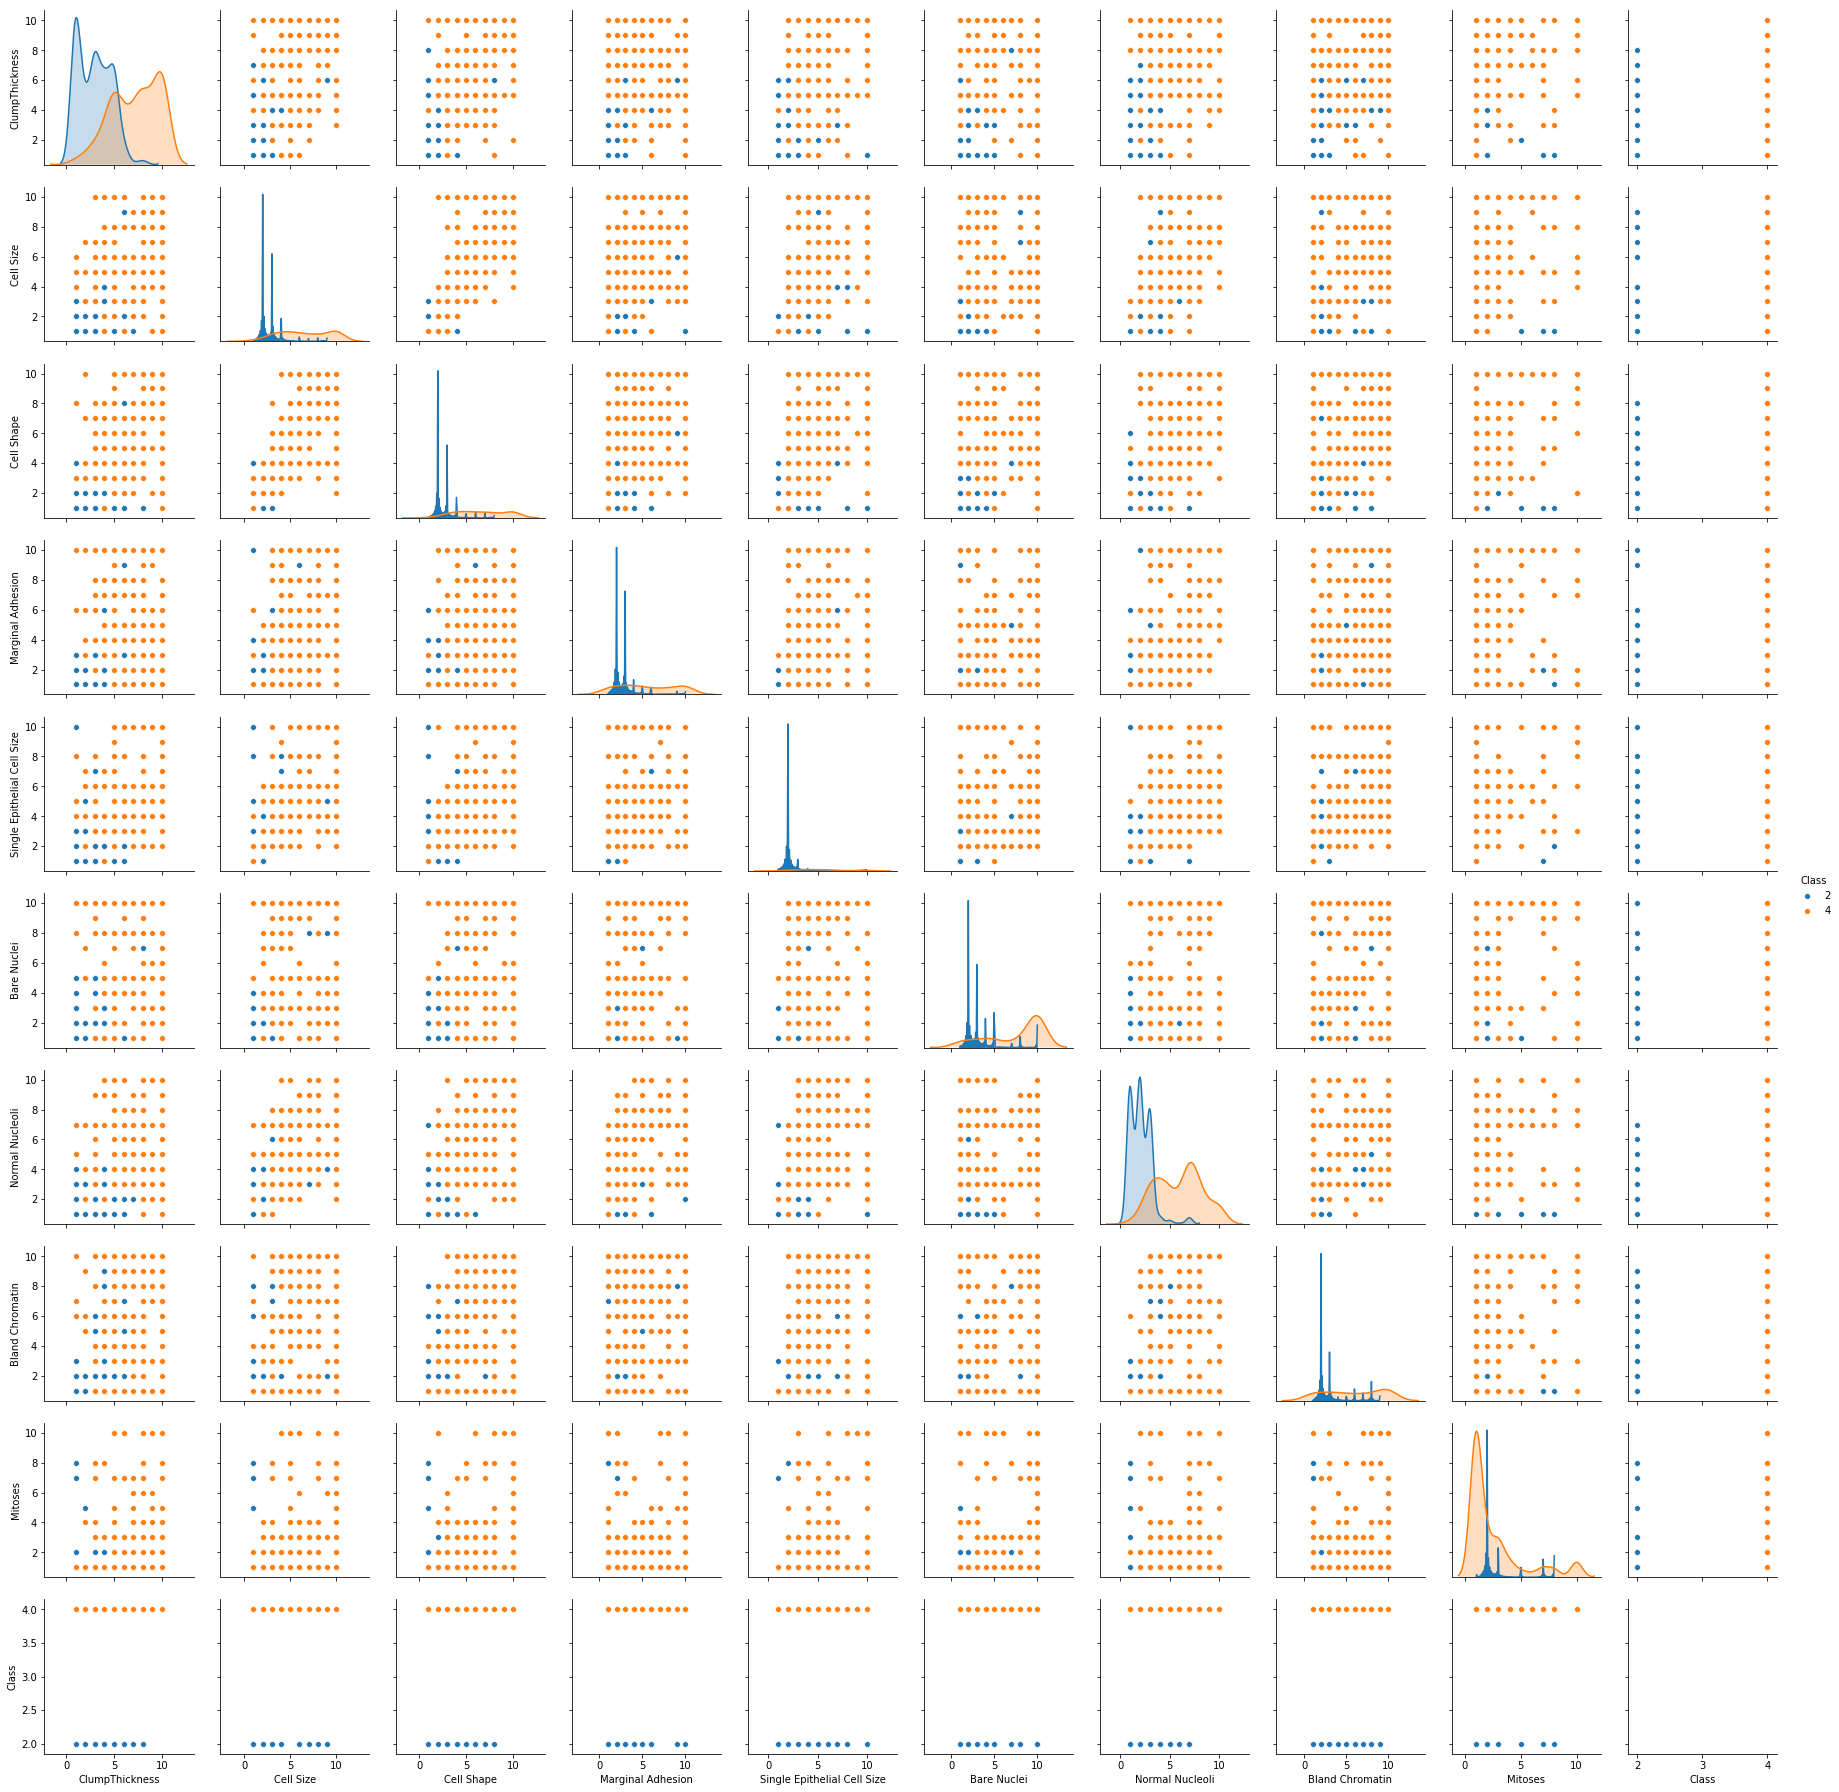

In [214]:
#Let us check for pair plots
sns.pairplot(BC,diag_kind='kde'
             
             ,hue='Class')

In [215]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [216]:
# We could see most of the outliers are now removed.

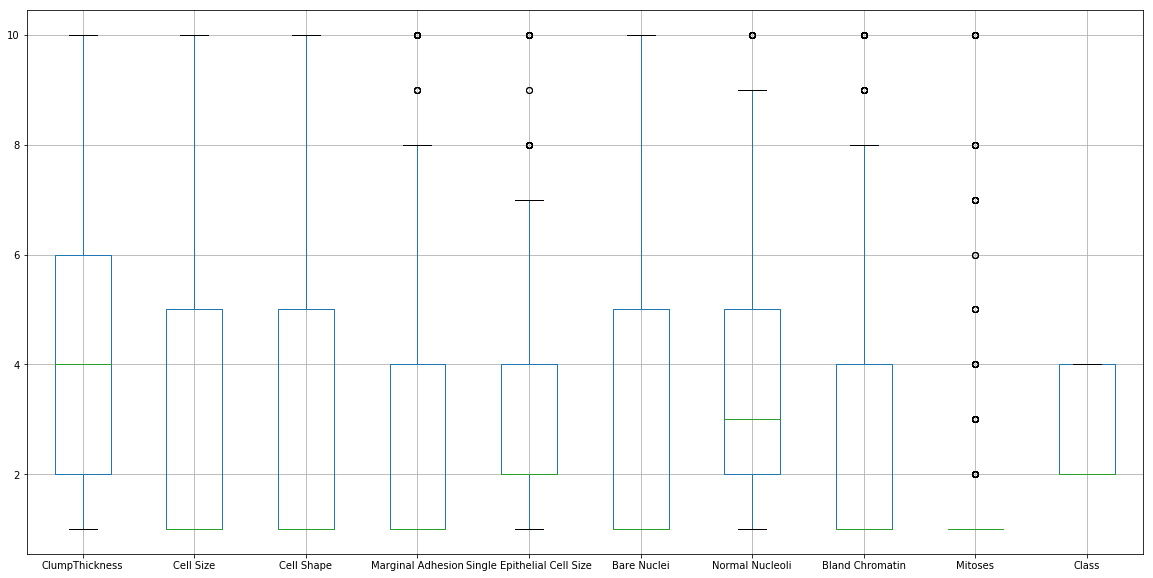

In [217]:

BC.boxplot(figsize=(20,10)) 

In [218]:
BC.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,4.428986,3.133333,3.204348,2.827536,3.213043,3.482609,3.436232,2.885507,1.594203,2.689855
std,2.817378,3.042451,2.960844,2.867787,2.200964,3.617064,2.444060,3.067682,1.724230,0.951379
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [219]:
pd.crosstab(BC['Marginal Adhesion'],BC['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [220]:
pd.crosstab(BC['Single Epithelial Cell Size'],BC['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [226]:
pd.crosstab(BC['Mitoses'],BC['Class'])


Class,2,4
Mitoses,,
1,439,132
2,13,106


In [225]:
BC['Marginal Adhesion']=np.where(BC['Marginal Adhesion']>4,4,BC['Marginal Adhesion'])
BC['Single Epithelial Cell Size']=np.where(BC['Single Epithelial Cell Size']>4,4,BC['Single Epithelial Cell Size'])
BC['Normal Nucleoli']=np.where(BC['Normal Nucleoli']>4,4,BC['Normal Nucleoli'])
BC['Bland Chromatin']=np.where(BC['Bland Chromatin']>4,4,BC['Bland Chromatin'])
BC['Mitoses']=np.where(BC['Mitoses']>1,2,BC['Mitoses'])

# Q6 Create a covariance matrix for identifying Principal components

In [227]:
# PCA
# Step 1 - Create covariance matrix
BC_PC_data=BC.drop('Class',axis=1)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,7.937620,5.513111,5.452123,2.021350,1.583623,6.019082,1.748234,2.105976,0.471627
Cell Size,5.513111,9.256507,8.155588,2.848573,2.264635,7.533527,2.311659,2.889115,0.566231
Cell Shape,5.452123,8.155588,8.766599,2.703856,2.139648,7.541295,2.214369,2.781687,0.519133
Marginal Adhesion,2.021350,2.848573,2.703856,1.686292,0.869460,3.268757,0.890663,1.108285,0.205044
Single Epithelial Cell Size,1.583623,2.264635,2.139648,0.869460,0.929429,2.377548,0.695694,0.911403,0.165878
Bare Nuclei,6.019082,7.533527,7.541295,3.268757,2.377548,13.083151,2.637300,3.032322,0.636531
Normal Nucleoli,1.748234,2.311659,2.214369,0.890663,0.695694,2.637300,1.292066,0.971843,0.162022
Bland Chromatin,2.105976,2.889115,2.781687,1.108285,0.911403,3.032322,0.971843,1.711819,0.245636
Mitoses,0.471627,0.566231,0.519133,0.205044,0.165878,0.636531,0.162022,0.245636,0.142927


In [229]:
Cov_matrix=np.cov(BC_PC_data.T)
print(Cov_matrix)

[[ 7.93762016  5.51311079  5.45212343  2.02134999  1.58362256  6.01908248
   1.74823416  2.10597589  0.4716266 ]
 [ 5.51311079  9.25650701  8.15558781  2.84857281  2.26463474  7.53352685
   2.31165941  2.88911466  0.56623125]
 [ 5.45212343  8.15558781  8.76659936  2.70385562  2.13964788  7.54129488
   2.21436865  2.78168739  0.51913296]
 [ 2.02134999  2.84857281  2.70385562  1.68629183  0.86946005  3.26875749
   0.8906628   1.10828548  0.20504407]
 [ 1.58362256  2.26463474  2.13964788  0.86946005  0.92942933  2.3775478
   0.69569424  0.91140279  0.16587787]
 [ 6.01908248  7.53352685  7.54129488  3.26875749  2.3775478  13.08315139
   2.63730044  3.03232158  0.63653057]
 [ 1.74823416  2.31165941  2.21436865  0.8906628   0.69569424  2.63730044
   1.2920658   0.97184325  0.16202225]
 [ 2.10597589  2.88911466  2.78168739  1.10828548  0.91140279  3.03232158
   0.97184325  1.71181927  0.2456364 ]
 [ 0.4716266   0.56623125  0.51913296  0.20504407  0.16587787  0.63653057
   0.16202225  0.245636

# Q7 Identify eigen values and eigen vector

In [25]:
# Step 2- Get eigen values and eigen vector

In [234]:
eigval,eigenvec=np.linalg.eig(Cov_matrix)
eigval,eigenvec

(array([33.65662175,  4.38980202,  3.55940169,  0.09734036,  0.94355395,
         0.78521316,  0.27302279,  0.50511406,  0.59634153]),
 array([[-0.37843987, -0.30647896, -0.87135491,  0.0206164 , -0.02743371,
         -0.04649941, -0.00487784, -0.00747814,  0.01322824],
        [-0.48087559, -0.37176453,  0.36319043,  0.03091236,  0.29259529,
         -0.62301088, -0.08543697, -0.0286215 , -0.12575259],
        [-0.47084283, -0.31640044,  0.31336008, -0.01698488, -0.62762844,
          0.42310295, -0.00227839,  0.03763567,  0.07320909],
        [-0.17674093,  0.02819162,  0.05893245, -0.00735089,  0.36947509,
          0.1629591 , -0.13724141,  0.16113599,  0.86981221],
        [-0.13509349, -0.0207687 ,  0.05001891,  0.01018589,  0.20432108,
          0.10953111,  0.95516778, -0.10733471,  0.03320201],
        [-0.54871597,  0.8153881 , -0.03876674,  0.01828136, -0.10851712,
         -0.1176541 , -0.02434818, -0.04606233, -0.0623132 ],
        [-0.14495042,  0.00846178,  0.01949325, -

# Q8 Find variance and cumulative variance by each eigen vector

In [235]:
total=sum(eigval)

In [236]:
total

44.80641130813402

In [238]:
list=sorted(eigval,reverse=True)
list

[33.65662174591017,
 4.3898020216041145,
 3.559401690435782,
 0.9435539463933614,
 0.7852131592145035,
 0.5963415299431866,
 0.5051140630621151,
 0.27302278833165466,
 0.09734036323913697]

In [240]:
cumsum=0
for i in list:
    var=(i/total)*100
    cumsum=var+cumsum

In [242]:
cumsum

100.00000000000004

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [253]:
import numpy as np
from sklearn.decomposition import PCA

model = PCA()
model.fit(BC_PC_data)

print(model.explained_variance_)
print (model.explained_variance_ratio_)
print (model.explained_variance_ratio_.cumsum())

[33.65662175  4.38980202  3.55940169  0.94355395  0.78521316  0.59634153
  0.50511406  0.27302279  0.09734036]
[0.75115638 0.09797263 0.07943956 0.02105846 0.01752457 0.01330929
 0.01127325 0.00609339 0.00217247]
[0.75115638 0.84912901 0.92856857 0.94962703 0.9671516  0.98046089
 0.99173415 0.99782753 1.        ]


# Q10 Find correlation between components and features

In [258]:
df_comp=pd.DataFrame(model.components_,BC_PC_data.columns)

In [260]:
df_comp.T

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.378440,0.306479,0.871355,-0.027434,0.046499,0.013228,0.007478,-0.004878,-0.020616
1,0.480876,0.371765,-0.363190,0.292595,0.623011,-0.125753,0.028622,-0.085437,-0.030912
2,0.470843,0.316400,-0.313360,-0.627628,-0.423103,0.073209,-0.037636,-0.002278,0.016985
3,0.176741,-0.028192,-0.058932,0.369475,-0.162959,0.869812,-0.161136,-0.137241,0.007351
4,0.135093,0.020769,-0.050019,0.204321,-0.109531,0.033202,0.107335,0.955168,-0.010186
5,0.548716,-0.815388,0.038767,-0.108517,0.117654,-0.062313,0.046062,-0.024348,-0.018281
6,0.144950,-0.008462,-0.019493,0.331414,-0.316729,-0.381590,-0.788100,-0.026393,0.031234
7,0.176190,0.039935,-0.051949,0.466738,-0.527211,-0.266442,0.575374,-0.245076,-0.082207
8,0.034908,0.001504,0.009075,0.044760,-0.003830,-0.022147,0.077096,-0.011791,0.995040


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [251]:
Jokes=pd.read_csv('jokes.csv')

In [252]:
Jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [254]:
Rating=Jokes.iloc[0:200,1:]

In [261]:
Rating.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [271]:
Rating=Rating.replace(99.00,0)

In [272]:
Rating.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [281]:
Rating_diff=Rating.mean()

In [282]:
Rating_diff.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64